# Project 3

## Logsitic Regression

Incorporating the necessary tools needed for this project

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, auc
cvp = cross_val_predict
lr = LinearRegression()
lgr = LogisticRegression()

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Importing my necessary csv files

In [2]:
batt = pd.read_csv("Batting.csv")
f_of = pd.read_csv('FieldingPost.csv')

In [3]:
f_of.info() #getting a better understanding of the f_of file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13110 entries, 0 to 13109
Data columns (total 17 columns):
playerID    13110 non-null object
yearID      13110 non-null int64
teamID      13110 non-null object
lgID        13110 non-null object
round       13110 non-null object
POS         13110 non-null object
G           13110 non-null int64
GS          13110 non-null int64
InnOuts     13110 non-null float64
PO          13110 non-null int64
A           13110 non-null int64
E           13110 non-null int64
DP          13110 non-null int64
TP          13110 non-null float64
PB          1028 non-null float64
SB          0 non-null float64
CS          0 non-null float64
dtypes: float64(5), int64(7), object(5)
memory usage: 1.7+ MB


In [4]:
f_of.head()

,playerID,yearID,teamID,lgID,round,POS,G,GS,InnOuts,PO,A,E,DP,TP,PB,SB,CS
0,beaumgi01,1903,PIT,NL,WS,CF,8,8,210.0,21,0,0,0,0.0,NaN,NaN,NaN
1,branski01,1903,PIT,NL,WS,1B,8,8,210.0,81,6,3,5,0.0,NaN,NaN,NaN
2,clarkfr01,1903,PIT,NL,WS,LF,8,8,210.0,18,0,1,0,0.0,NaN,NaN,NaN
3,colliji01,1903,BOS,AL,WS,3B,8,8,213.0,9,18,1,1,0.0,NaN,NaN,NaN
4,crigelo01,1903,BOS,AL,WS,C,8,8,213.0,54,7,3,2,0.0,0.0,NaN,NaN


In [5]:
f_of_1 = f_of[['playerID','POS']]
#developing a new dataframe to help me match playerID and POS

In [6]:
batt.info() #understanding the batting info dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104324 entries, 0 to 104323
Data columns (total 22 columns):
playerID    104324 non-null object
yearID      104324 non-null int64
stint       104324 non-null int64
teamID      104324 non-null object
lgID        103586 non-null object
G           104324 non-null int64
AB          104324 non-null int64
R           104324 non-null int64
H           104324 non-null int64
2B          104324 non-null int64
3B          104324 non-null int64
HR          104324 non-null int64
RBI         103568 non-null float64
SB          101956 non-null float64
CS          80832 non-null float64
BB          104324 non-null int64
SO          97974 non-null float64
IBB         67722 non-null float64
HBP         101507 non-null float64
SH          98255 non-null float64
SF          68259 non-null float64
GIDP        78921 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.5+ MB


In [7]:
batt.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2004,1,SFN,NL,11,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,1,CHN,NL,45,2,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,1,CHA,AL,25,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,1,BOS,AL,47,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,1,SEA,AL,73,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
base_df = pd.merge(batt,f_of_1,left_on='playerID',right_on='playerID')
#merging the two files together

In [9]:
base_df.info() #new file, and see where we may have nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175255 entries, 0 to 175254
Data columns (total 23 columns):
playerID    175255 non-null object
yearID      175255 non-null int64
stint       175255 non-null int64
teamID      175255 non-null object
lgID        175255 non-null object
G           175255 non-null int64
AB          175255 non-null int64
R           175255 non-null int64
H           175255 non-null int64
2B          175255 non-null int64
3B          175255 non-null int64
HR          175255 non-null int64
RBI         175255 non-null float64
SB          175255 non-null float64
CS          163412 non-null float64
BB          175255 non-null int64
SO          172941 non-null float64
IBB         152634 non-null float64
HBP         175255 non-null float64
SH          175232 non-null float64
SF          153113 non-null float64
GIDP        161425 non-null float64
POS         175255 non-null object
dtypes: float64(9), int64(10), object(4)
memory usage: 32.1+ MB


In [10]:
#due to null values, I will fill the null values with the median score
base_df=base_df.fillna(base_df.median())

Now filling the null values with the median, I will be starting to develop a classification model to see if hits, RBI, trikeouts and homeruns will tell us if the player plays in the National or the American League

I will be using Precision as my main KPI in this classification model. Through this I will be looking at which of my results produces the least amount of false positives

Due to the very large data set, I will only be looking stats that is pass the year 2015

In [11]:
base_df = base_df[base_df['yearID']>2015]

In [12]:
base_df1 = base_df.copy()

Need to replace all of the position strings with numeric values

A variety of dummy variables must be developed now to decide if the player is in the American Leauge or the National League

In [13]:
league_dummies = pd.get_dummies(base_df1.lgID,prefix = 'league')

In [14]:
league_dummies.head()

,league_AL,league_NL
111,1,0
112,1,0
113,1,0
442,0,1
443,0,1


In [15]:
base_df1['AL'] = league_dummies['league_AL']

In [16]:
X=base_df1[['H','RBI','SO','HR']]
y = base_df1.AL

In [17]:
lgr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
cvp(lgr,X,y)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [20]:
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
cvp(lgr,X_train,y_train)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [22]:
lgr.score(X_train,y_train)

0.57777281856728413

In [23]:
k = np.arange(1,100)
params_2 = {'fit_intercept':[True,False], 'normalize':[True,False]}
grid_2 = GridSearchCV(lgr,params_2,cv=5,scoring='precision')

In [24]:
lgr_pred = lgr.predict(X_train)

In [25]:
print(classification_report(y_train,lgr_pred))

             precision    recall  f1-score   support

          0       0.60      0.40      0.48      2171
          1       0.57      0.75      0.65      2310

avg / total       0.58      0.58      0.56      4481



In [26]:
confusion_matrix(y_train,lgr_pred)

array([[ 865, 1306],
       [ 586, 1724]])

In [27]:
lgr.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
cvp(lgr,X_test,y_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

In [29]:
k = np.arange(1,100)
params_3 = {'fit_intercept':[True,False], 'normalize':[True,False]}
grid_3 = GridSearchCV(lgr,params_2,cv=5,scoring='precision')


In [30]:
lgr.score(X_test,y_test)

0.58835341365461846

In [31]:
lgr_pred_test = lgr.predict(X_test)

In [32]:
print(classification_report(y_test,lgr_pred_test))

             precision    recall  f1-score   support

          0       0.61      0.50      0.55       748
          1       0.58      0.67      0.62       746

avg / total       0.59      0.59      0.59      1494



In [33]:
confusion_matrix(y_test,lgr_pred_test)

array([[377, 371],
       [244, 502]])

After fitting my test and train data set, it appears that both models do a similar job at assigning if the person plays in the AL or the NL. The test data set may have done a slightly better job than the train data set. The precision for playing in the AL was around 0.58 compared to the train data set that obtained a 0.57. The test set also did a better job at classifying if the player is in the NL. The precision amongst the test data set was 0.61, slightly outperforming the train set

Another observation is that the test data set had did a better job at minimizing the false positive but did a poor job at reducing false negatives. In the test set for classifiying zero, playing in the NL, developed a recall of 0.46, thus having a large amount of false negatives appearing in the data set. With the NL section in the test set, there appears to be more false negatives than items that were classified correctly. This shows the trade off between optimizing towards one indicator over the other.


Text(0,0.5,'Recall')

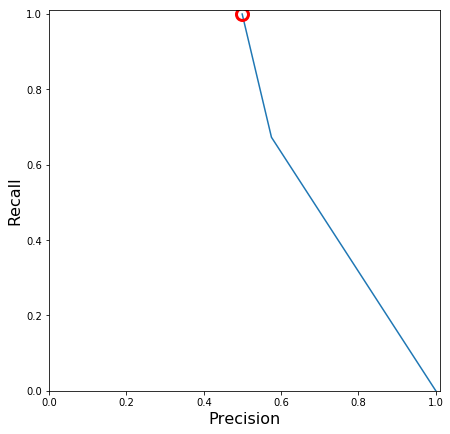

In [34]:
from sklearn.metrics import precision_recall_curve
y_scores_lgr = lgr.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, lgr_pred_test)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize = (7, 7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

As seen in the Recall v. Precision chart above, the top recall occurs, where there are no false negatives, at a precision of 0.5. Therefore the top recall occurs when the false positive is the same size as the right selection. A perfect model would have Recall and Precision be equal to each other.

After a precision of 0.5, the line appears to decrease at a steady pace

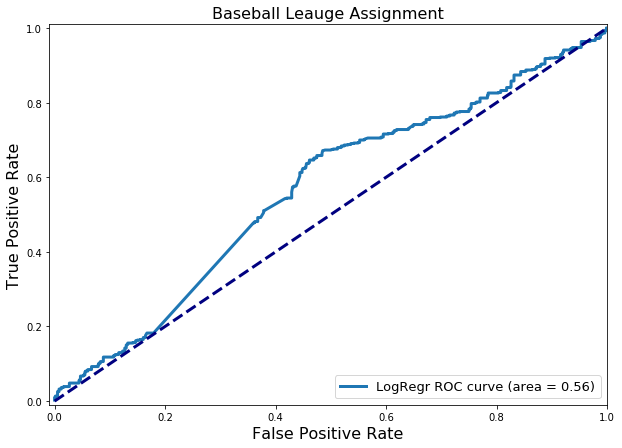

In [35]:
y_score_lr = lgr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (10, 7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Baseball Leauge Assignment', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

The chart above displays the True Postive Rate and the False Positive Rate. For the most part, the LogRegr Roc Curve is a little bit above the intersection, hugging the line around 0.18 but then a little after 0.2 the rate starts to increase at a steady rate. Around a True Positive Rate of 0.64 appears to be where the curve is the furthest away from the threshold line. When the true positive rate is greater than 0.9, the LogReg Roc curve appears to be moving around the threshold, thus falling under the false positive rate portion of the graph



## KNeighbors Classifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=4)

In [37]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [38]:
knn.score(X,y)

0.84401673640167363

In [39]:
cvp(knn,X,y)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [40]:
k = np.arange(1,10)
params = [{'n_neighbors': k}]
grid = GridSearchCV(knn, param_grid = params, cv = 5,scoring='precision')

In [41]:
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, scoring='precision', verbose=0)

In [42]:
grid.score(X,y)

0.75721748693978552

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [45]:
knn.score(X_train,y_train)

0.84155322472662353

In [46]:
cvp(knn,X_train,y_train)

array([0, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [47]:
k = np.arange(1, 50)
params_1 = [{'n_neighbors': k}]
grid = GridSearchCV(knn, param_grid = params_1, cv = 4,scoring='precision')

In [48]:
knn.score(X_train,y_train)

0.84155322472662353

In [49]:
pred = knn.predict(X_train)

In [50]:
print(classification_report(y_train,pred))

             precision    recall  f1-score   support

          0       0.89      0.77      0.83      2196
          1       0.80      0.91      0.85      2285

avg / total       0.85      0.84      0.84      4481



In [51]:
confusion_matrix(y_train,pred)

array([[1692,  504],
       [ 206, 2079]])

In [52]:
cvp(knn,X_test,y_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [53]:
knn.score(X_test,y_test)

0.81057563587684067

In [54]:
pred_test = knn.predict(X_test)

In [55]:
print(classification_report(y_test,pred_test))

             precision    recall  f1-score   support

          0       0.84      0.76      0.79       723
          1       0.79      0.86      0.82       771

avg / total       0.81      0.81      0.81      1494



In [56]:
confusion_matrix(y_test,pred_test)

array([[546, 177],
       [106, 665]])

Results: The training set did a better job at classifying if the player plays in the American Leauge or the National League by obtaining a precision score higher than the test project. This is positive to see that the training set is not picking up too many false positives, but the test & train set is a little too sensitive by obtaining a slightly smaller recall score, the test set obtained a recall of 0.84 and the training set obtined a slightly recall of 0.81. The training set did a great job at obtaining a high recall for selecting if someone was in the AL, garnering a recall of 0.91.

For upcoming test, it may be useful to examine the full data set to see if that improves the performance of the classification model. Maybe for the assignment right now, I did not take into consideration all the right variables. Maybe strike outs is not a good indicator of the league the player plays in.

In [57]:
pr_precision = knn.predict_proba(X)

In [58]:
precision_recall_curve(y,pr_precision[:,0])

(array([ 0.51146444,  0.34590764,  0.12235294,  0.03495146,  0.00328587,  1.        ]),
 array([ 1.        ,  0.49509162,  0.10209424,  0.02356021,  0.00196335,  0.        ]),
 array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]))

## Linear Regression Section

In [59]:
sal = pd.read_csv('Salaries.csv')

base_df2 = pd.merge(base_df1,sal, left_on="playerID",right_on='playerID')

X_1 = base_df2[['H','RBI','SO']]
y_1 = base_df2.salary

lr = LinearRegression()

In [60]:
lr.fit(X_1,y_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

There is a weak correlation between the Hits, RBI, Strike Outs and Homeruns and the league the player plays in. Cross validation will be included to see how performance alters

In [61]:
cvp(lr,X_1,y_1)

array([ 4993657.87705115,  4993657.87705115,  4993657.87705115, ...,
        5629538.14143678,  5629538.14143678,  5629538.14143678])

In [62]:
k = np.arange(1,100)
params_2 = {'fit_intercept':[True,False], 'normalize':[True,False]}
grid_2 = GridSearchCV(lr,params_2,cv=5,scoring='r2')

In [63]:
grid_2.fit(X_1,y_1)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [64]:
grid_2.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1)

In [66]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
lr.score(X_train,y_train)

0.032274027454508469

The train section is producing a very low r-squared score

In [68]:
lr.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
lr.score(X_test,y_test)

0.039124938117194419

In the end, both the test & train data set produced very low R-Squared vales, thus suggesting that the amount a player made during that year did not contribute their performance